# **NoteBook 2**

## Objectives
---

* Answer business requirement 1
    - The client is interested to predict the house prices of of homes in Iowa. 
    - The dataset is based on a previously colected features as well as sale price for each house.
    - The target variable is sale price

## Steps
---

* Perform EDA
* Remove over-correlated features

## Change working directory
---

First we set the working directory for the notebook.

In [1]:
import os
current_dir = os.getcwd()
current_dir
os.chdir(os.path.dirname(current_dir))
current_dir = os.getcwd()
print(current_dir)

/Users/matthewmurnaghan/Data-Science-Projects/AI-Projects/House-Price-Predictor


## Load Data
---

Load the data in from the outputs section of the last notebook. We can drop the SalePrice column as it is the target varialbe in this study.

In [2]:
import pandas as pd
df = pd.read_csv("outputs/datasets/collection/house_prices.csv")
df.head(3)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,1,706,6.0,150,0.0,548,2.0,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,4,978,5.0,284,NaN,460,2.0,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,2,486,6.0,434,0.0,608,2.0,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500


## Data Exploration
---

We can use a library called pandas-profiling to explore the dataset with a GUI that will give us insights into the characteristics of each feature and the relationships they share with each other.

In [3]:
from pandas_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

/var/folders/ph/7d3cvxsn1q3c_q7whlj76_lh0000gn/T/ipykernel_21656/962869596.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1374 non-null   float64
 2   BedroomAbvGr   1361 non-null   float64
 3   BsmtExposure   1460 non-null   int64  
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinType1   1346 non-null   float64
 6   BsmtUnfSF      1460 non-null   int64  
 7   EnclosedPorch  136 non-null    float64
 8   GarageArea     1460 non-null   int64  
 9   GarageFinish   1298 non-null   float64
 10  GarageYrBlt    1379 non-null   float64
 11  GrLivArea      1460 non-null   int64  
 12  KitchenQual    1460 non-null   int64  
 13  LotArea        1460 non-null   int64  
 14  LotFrontage    1201 non-null   float64
 15  MasVnrArea     1452 non-null   float64
 16  OpenPorchSF    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  OverallQ

## Correlation Study
---

Next we need to perform a correlation study on the different variables in the dataset. This will allow us to filter out the different variables that are not vital for determining the target variable.

In [5]:
corr_spearman = df.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(15)
corr_spearman

OverallQual     0.809829
GrLivArea       0.731310
KitchenQual     0.672849
YearBuilt       0.652682
GarageArea      0.649379
GarageFinish    0.636076
TotalBsmtSF     0.602725
GarageYrBlt     0.593788
1stFlrSF        0.575408
YearRemodAdd    0.571159
OpenPorchSF     0.477561
LotArea         0.456461
MasVnrArea      0.421309
LotFrontage     0.409076
BsmtFinType1    0.365329
Name: SalePrice, dtype: float64

We do the same for the pearson study.

In [6]:
corr_pearson = df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(15)
corr_pearson

OverallQual     0.790982
GrLivArea       0.708624
KitchenQual     0.659600
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GarageFinish    0.544382
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
BsmtFinSF1      0.386420
BsmtExposure    0.374696
LotFrontage     0.351799
2ndFlrSF        0.322335
Name: SalePrice, dtype: float64

Correlation results of 0.8 or more are considered strong correlation values, with 0.5 to 0.8 considered moderate in correlation.

We can select the top 6 values from each list as they are all above at least 0.6.

In [7]:
n_correlated_values = 6;
vars_to_study = set(corr_pearson[:n_correlated_values].index.to_list() + corr_spearman[:n_correlated_values].index.to_list())
vars_to_study

{'1stFlrSF',
 'GarageArea',
 'GarageFinish',
 'GrLivArea',
 'KitchenQual',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt'}

We can investigate if a house with a high sales price:
* Has a 1st floor, and how large it typically is.
* Has a garage area, and how large it typically is.
* Has a high quality of finish, and what the most common one is.
* Has a garage living area, and how large it typically is.
* Has a high quality kitchen finish.
* Has a high overall quality.
* Has a basement, and how large it typically is.
* Is built in or around a specific year, and what that range might be.

## EDA (Exploratory Data Analysis)
---

I chose to include just the top correlative features in the study. After analysing these results, features can be added or dropped to help improve the accuracy of the model.

In [8]:
df_eda = df.filter(list(vars_to_study) + ['SalePrice'])
df_eda.head(3)

,TotalBsmtSF,GarageFinish,OverallQual,1stFlrSF,GarageArea,GrLivArea,YearBuilt,KitchenQual,SalePrice
0,856,2.0,7,856,548,1710,2003,4,208500
1,1262,2.0,6,1262,460,1262,1976,3,181500
2,920,2.0,7,920,608,1786,2001,4,223500


## Variable Distribution by SalePrice
---

We can plot the distribution of the variables, both numerical and categorical.

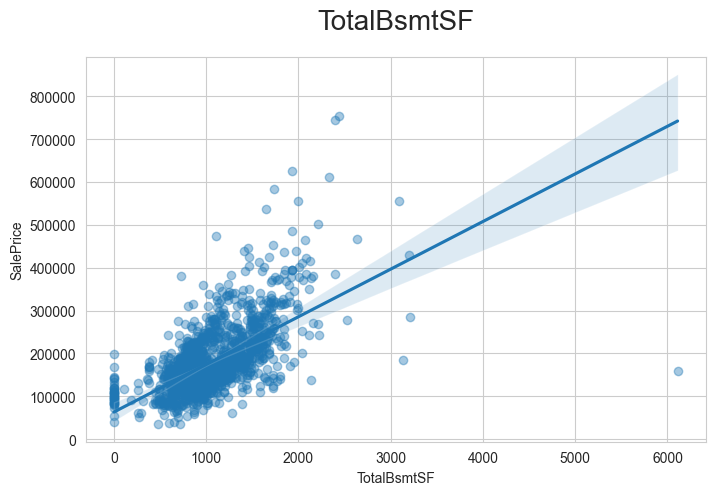

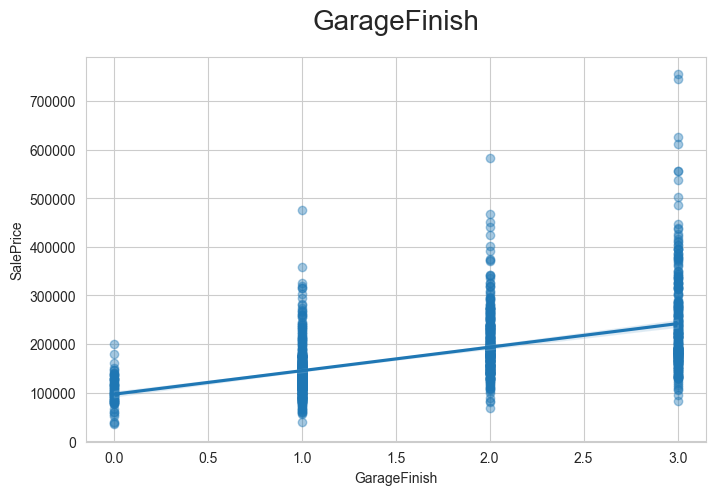

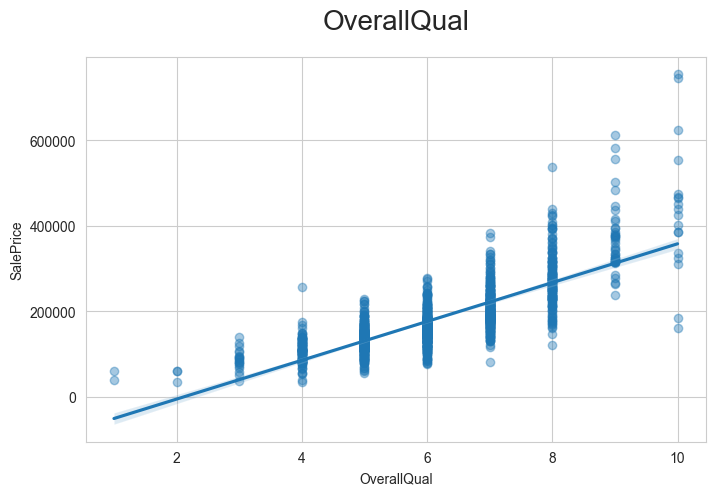

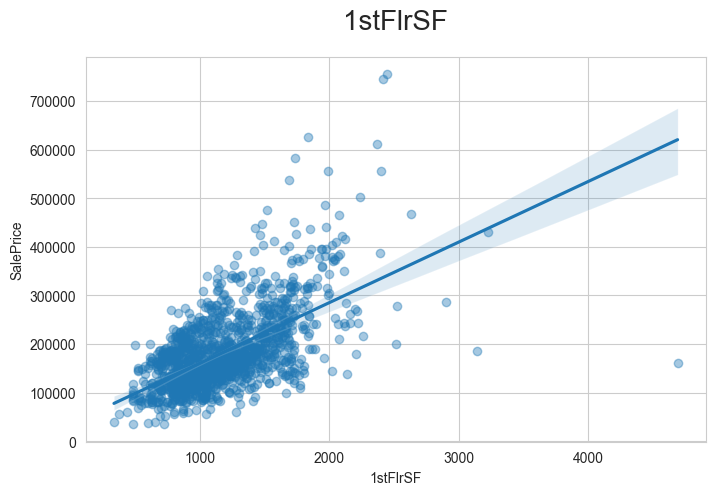

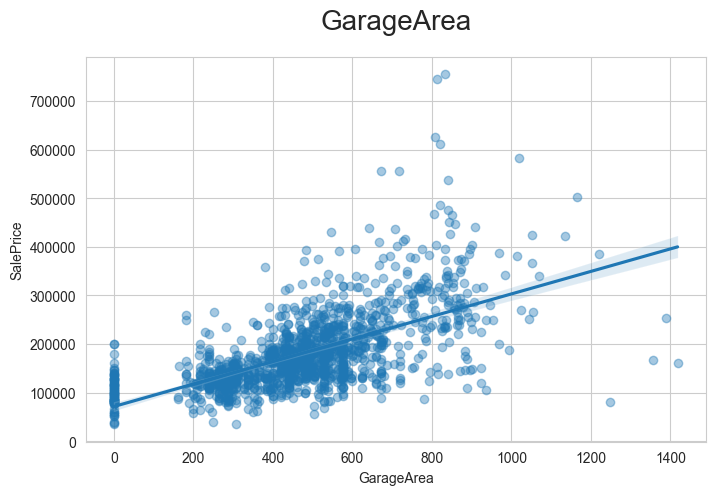

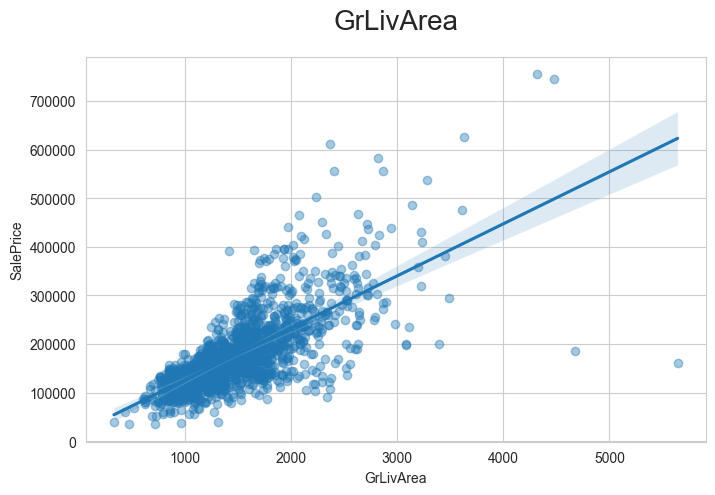

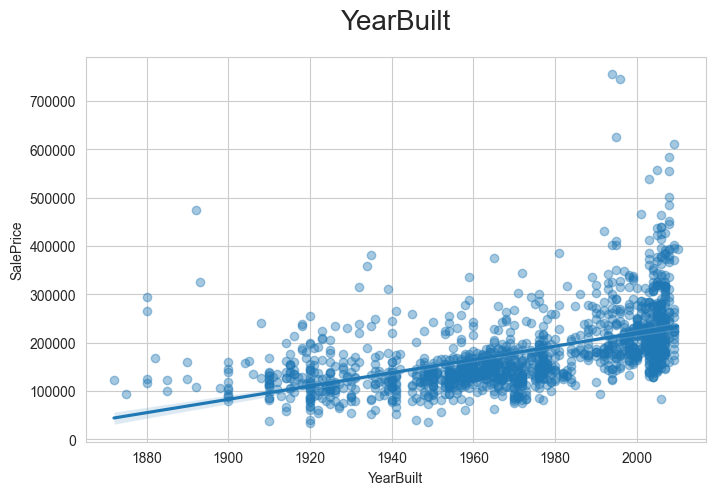

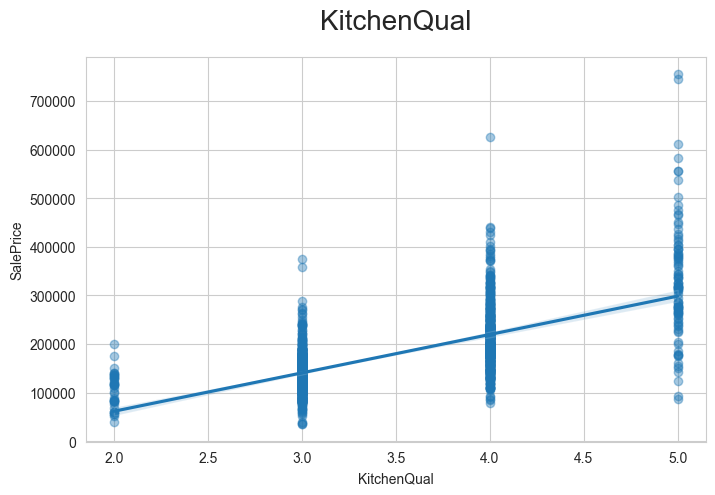

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

def plot_numerical(df, col, target_var):
    plt.figure(figsize=(8, 5))
    sns.regplot(data=df, x=col, y=target_var, scatter_kws={'alpha':0.4})
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()

target_var = 'SalePrice'
for col in vars_to_study:
    plot_numerical(df_eda, col, target_var)


## Conclusions
---

We can see from the above plots that there is definitely a correlative relationship between each of the selected features and the sale price of a given house in Ames Iowa.
The next step in this process is the data cleaning, carried out in the next jupyter notebook.